#**Builds, Trains & Tests your Neural Network**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# Mounts Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loads data for training and testing
data = pd.read_csv('/content/drive/MyDrive/AI Society/train.csv')
X_data = data.iloc[:, [2, 4, 6, 7]]
y_data = data.iloc[:, 1]

# Prepares the data
X_data['Sex'] = X_data['Sex'].map({'male': 0, 'female': 1})

# Splits the data into a training set and a testing set
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Builds the model
NN_model = tf.keras.Sequential()
NN_model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(4,)))
NN_model.add(tf.keras.layers.Dense(4, activation='relu'))
NN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compiles the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trains the model
train_history = NN_model.fit(X_train_data, y_train_data, epochs=100, batch_size=32)

# Evaluates the model on the test data
loss, accuracy = NN_model.evaluate(X_test_data, y_test_data)
print(f'Test model loss: {round(loss,4)}')
print(f'Test model accuracy: {round(100*accuracy,2)}%')

<ipython-input-3-b64fc388e8ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data['Sex'] = X_data['Sex'].map({'male': 0, 'female': 1})
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4257 - loss: 0.6920
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.6691  
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7890 - loss: 0.6672 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7795 - loss: 0.6687 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7794 - loss: 0.6590 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.6514 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.6447 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.6393 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7783 - loss: 0.6413 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.6324 
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8056 - loss: 0.6246 
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

#**Plots Loss & Accuracy Graph**

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Plots a loss and accuracy against epoch graph
def plot_graph(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid(True)
  plt.show

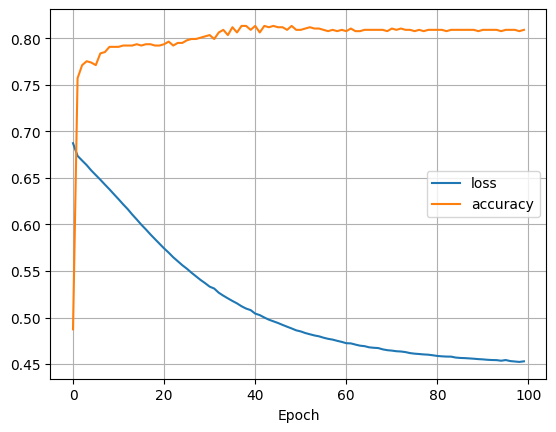

In [6]:
# Plots the graph using the model's training history
plot_graph(train_history)

#**Applies the Model**

In [10]:
# Loads data for predictions
prediction_data = pd.read_csv('/content/drive/MyDrive/AI Society/test.csv')
X_prediction_data = prediction_data.iloc[:, [1, 3, 5, 6]]

# Prepares the data
X_prediction_data['Sex'] = X_prediction_data['Sex'].map({'male': 0, 'female': 1})

# Calculates the predictions
predictions = NN_model.predict(X_prediction_data, verbose = 0)
rounded_predictions = np.round(predictions).astype(int)
text_predictions = np.where(rounded_predictions == 1, 'survived', 'perished')

# Displays the predictions in a readable format
print('Predictions:')
for i, pred in enumerate(text_predictions):
    name = prediction_data.iloc[i,2].split(',')
    firstname = name[1].lstrip()
    surname = name[0]
    output = f'{firstname} {surname} {pred[0]}.'
    print(output)

<ipython-input-10-21935967a85a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_prediction_data['Sex'] = X_prediction_data['Sex'].map({'male': 0, 'female': 1})


Predictions:
Mr. James Kelly perished.
Mrs. James (Ellen Needs) Wilkes survived.
Mr. Thomas Francis Myles perished.
Mr. Albert Wirz perished.
Mrs. Alexander (Helga E Lindqvist) Hirvonen survived.
Mr. Johan Cervin Svensson perished.
Miss. Kate Connolly survived.
Mr. Albert Francis Caldwell perished.
Mrs. Joseph (Sophie Halaut Easu) Abrahim survived.
Mr. John Samuel Davies perished.
Mr. Ylio Ilieff perished.
Mr. Charles Cresson Jones perished.
Mrs. John Pillsbury (Nelle Stevenson) Snyder survived.
Mr. Benjamin Howard perished.
Mrs. Herbert Fuller (Carrie Constance Toogood) Chaffee survived.
Mrs. Sebastiano (Argenia Genovesi) del Carlo survived.
Mr. Daniel Keane perished.
Mr. Gerios Assaf perished.
Miss. Ida Livija Ilmakangas survived.
Mrs. Mariana (Miriam")" Assaf Khalil survived.
Mr. Martin Rothschild perished.
Master. Artur Karl Olsen perished.
Mrs. Alfred (Antoinette) Flegenheim survived.
Mr. Richard Norris II Williams perished.
Mrs. Arthur Larned (Emily Maria Borie) Ryerson survived.